# Demonstration File

In [1]:
#Import necessary libraries
import test_manifold_algorithms as tma
from DIG_final import DIG
from SPUD import SPUD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Prep the domains
dc = tma.test_manifold_algorithms("seeds.csv", split = "even", verbose = 3, random_state=2816)

2024-07-11 14:41:39.379251: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 14:41:39.384907: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 14:41:39.487292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 14:41:41.410437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (199, 4)
Split B Features shape (199, 3)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


# Testing with Timeless Variables

In [118]:
import pandas as pd
timeless = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Timeless.csv")
timeless = timeless.fillna(-4).drop(columns = ["PTRACCAT"])

In [119]:
timeless.sample(5)

,RID,PTEDUCAT,PTHAND,MOTHAD,FATHAD,MOTHDEM,FATHDEM,PHS,CIR,MOTHSXAGE,FATHSXAGE,PTGENDER,PTDOBYY,PTPLANG,PTETHCAT,PTIDENT,PTENGSPK,PTETHCATH
304,306,13.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1930.0,-4.0,-4.0,-4.0,-4.0,-4.0
626,629,20.0,1.0,-4.0,-4.0,-4.0,-4.0,2.364390,0.307706,-4.0,-4.0,1.0,1935.0,1.0,2.0,-4.0,-4.0,-4.0
2699,4865,18.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1945.0,1.0,2.0,-4.0,-4.0,-4.0
114,116,18.0,1.0,-4.0,-4.0,-4.0,-4.0,-0.262221,0.061874,-4.0,-4.0,1.0,1927.0,1.0,2.0,-4.0,-4.0,-4.0
3020,5188,19.0,1.0,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,1.0,1933.0,1.0,2.0,-4.0,-4.0,-4.0


In [120]:
len(timeless.columns), len(timeless)

(18, 4385)

In [121]:
np.array(timeless)[:, 1]

array([18., 16., 18., ...,  8., -4., -4.])

In [122]:
domain_a = np.array(timeless)[:200, :10].astype(float)
domain_b = np.array(timeless)[:200, 10:].astype(float)

In [123]:
dc.anchors[:22]

array([[115, 115],
       [ 54,  54],
       [ 85,  85],
       [ 70,  70],
       [ 40,  40],
       [186, 186],
       [100, 100],
       [191, 191],
       [110, 110],
       [137, 137],
       [183, 183],
       [176, 176],
       [114, 114],
       [134, 134],
       [118, 118],
       [ 77,  77],
       [153, 153],
       [ 16,  16],
       [ 38,  38],
       [ 44,  44],
       [ 11,  11],
       [ 14,  14]])

In [125]:
domain_a.shape

(200, 10)

In [126]:
dig_time = DIG(domain_a, domain_b, known_anchors= dc.anchors[:22], t = -1, knn = 2, link = "None", verbose = 2)

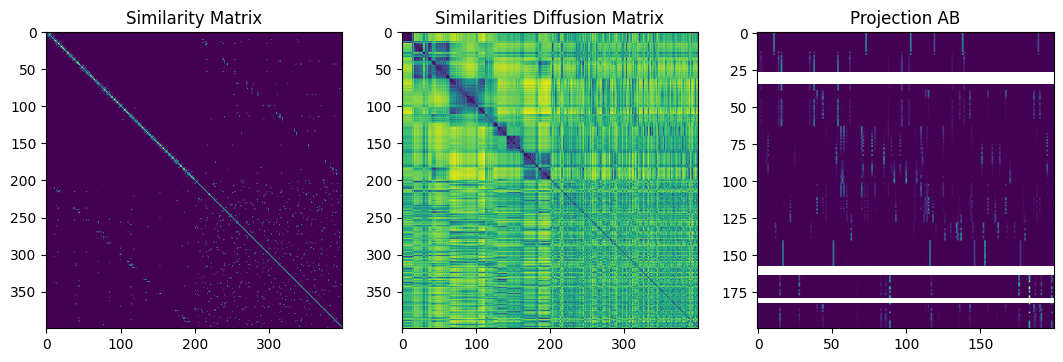

In [127]:
dig_time.plot_graphs()

Model Stress: 1280.2896694976776
Can't calculate the Cross embedding
FOSCTTM: 0.030225


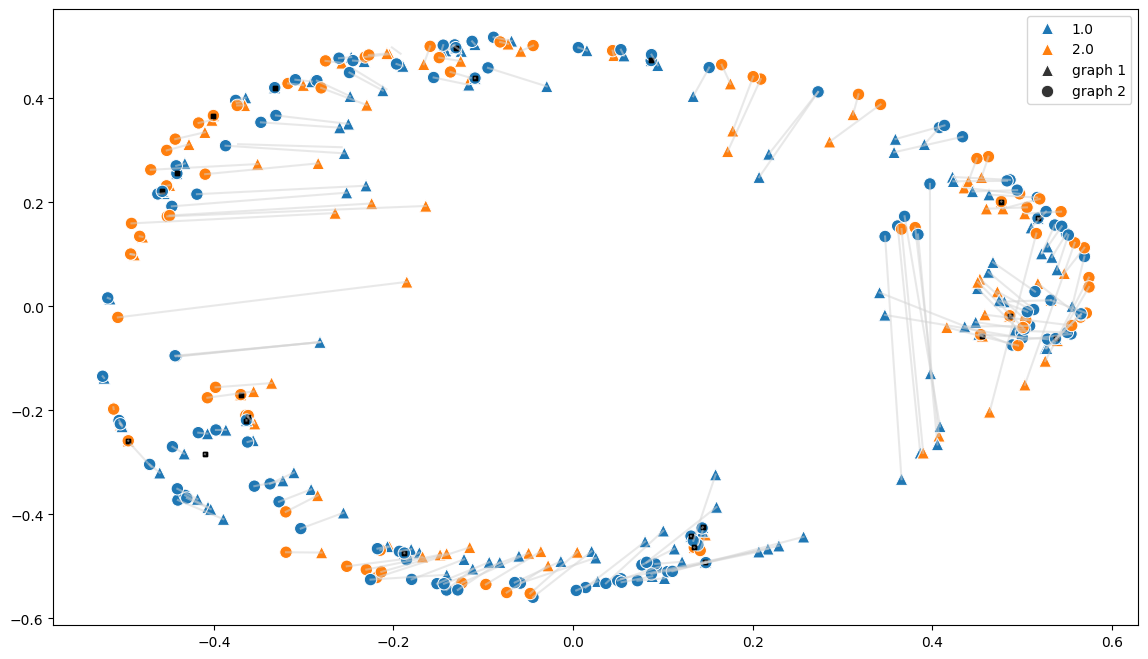

In [132]:
timeless = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Timeless.csv")

dig.plot_emb(labels = pd.concat([timeless["PTGENDER"][:200], timeless["PTGENDER"][:200]]))

# Testing with Timeless and Timefull variables

In [4]:
#Create dataclasses. Note, we want to distort to leave domain unchanged
timeless_data = tma.test_manifold_algorithms("Timeless Variables 2024-07-09.csv", split = "distort", verbose = 3, random_state=2816)
visits_data = tma.test_manifold_algorithms("Visit Variables 2024-07-09.csv", split = "distort", verbose = 3, random_state=2816)


 
 
---------------------------       Initalizing class with Timeless Variables 2024-07-09.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (4385, 34)
Split B Features shape (4385, 34)
MDS initialized with 34 components
The knn values are: (2, 90, 178, 266, 354, 442, 530, 618, 706, 794)

 
 
---------------------------       Initalizing class with Visit Variables 2024-07-09.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (20445, 16)
Split B Features shape (20445, 16)
MDS initialized with 16 components
The knn values are: (2, 411, 820, 1229, 1638, 2047, 2456, 2865, 3274, 3683)


In [36]:
#Read in the visits data to get the RDI
visits_labels = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/CSV Files/Visit Variables 2024-07-09.csv")["RID"].values

#Create the anchors
TV_anchors = np.array([(visits_labels[x]-1, x) for x in range(0, len(visits_labels))])

In [37]:
#Reset NaN values to be -4 :)
timeless_data.split_A[np.isnan(timeless_data.split_A)] = -4
visits_data.split_A[np.isnan(visits_data.split_A)] = -4


In [41]:
TV_anchors[:,0][-25:]

array([7075, 7075, 7077, 7078, 7078, 7079, 7081, 7082, 7082, 7082, 7084,
       7085, 7087, 7087, 7088, 7091, 7099, 7104, 7104, 7113, 7116, 7120,
       7121, 7122, 7124])

In [39]:
len(TV_anchors), len(timeless_data.labels), max(TV_anchors[:,0]), max(timeless_data.labels)

(20445, 4385, 7124, 4385)

In [15]:
#Create the merged values
tv = DIG(n_pca = 10)
tv.fit(timeless_data.split_A, visits_data.split_A, known_anchors = TV_anchors)

InternalError: Error at src/graph/type_indexededgelist.c:913: Given vertex is not in the graph. -- Invalid vertex ID